In [1]:
import os,shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
#loading data
my_data = 'C:/Users/Admin/Desktop/Me/capstone/color_sample'


In [3]:
#Normalize images - divide by 255
train_datagen = ImageDataGenerator(rescale=1. / 255)


In [4]:
#Resize images, if needed
train = train_datagen.flow_from_directory(my_data,target_size=(256, 256), batch_size=100, class_mode = None)                                       

Found 5100 images belonging to 3 classes.


In [5]:
X =[]

In [6]:
from skimage.color import rgb2lab

In [7]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)


(100, 256, 256, 1)
(100, 256, 256, 2)


In [8]:
#Encoder
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras import models
from keras import layers

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))


In [9]:
#Decoder
from keras.layers import UpSampling2D

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

In [10]:
history = model.fit(X,Y,validation_split=0.1, epochs=50, batch_size=16)

Epoch 1/50
6/6 [==============================] - 61s 10s/step - loss: 0.5202 - accuracy: 0.3944 - val_loss: 0.0342 - val_accuracy: 0.3650
Epoch 2/50
6/6 [==============================] - 61s 10s/step - loss: 0.0158 - accuracy: 0.3726 - val_loss: 0.0309 - val_accuracy: 0.3627
Epoch 3/50
6/6 [==============================] - 71s 11s/step - loss: 0.0146 - accuracy: 0.3719 - val_loss: 0.0308 - val_accuracy: 0.3658
Epoch 4/50
6/6 [==============================] - 69s 11s/step - loss: 0.0145 - accuracy: 0.3747 - val_loss: 0.0307 - val_accuracy: 0.3678
Epoch 5/50
6/6 [==============================] - 61s 10s/step - loss: 0.0143 - accuracy: 0.3770 - val_loss: 0.0305 - val_accuracy: 0.3719
Epoch 6/50
6/6 [==============================] - 59s 10s/step - loss: 0.0141 - accuracy: 0.3809 - val_loss: 0.0303 - val_accuracy: 0.3776
Epoch 7/50
6/6 [==============================] - 58s 10s/step - loss: 0.0140 - accuracy: 0.3891 - val_loss: 0.0302 - val_accuracy: 0.4322
Epoch 8/50
6/6 [===========

In [16]:
model.save(r'C:/Users/Admin/Desktop/Me/capstone/color_sample/colorize_autoencoder.model')

INFO:tensorflow:Assets written to: C:/Users/Admin/Desktop/Me/capstone/color_sample/colorize_autoencoder.model\assets


INFO:tensorflow:Assets written to: C:/Users/Admin/Desktop/Me/capstone/color_sample/colorize_autoencoder.model\assets


### Ploting Curve

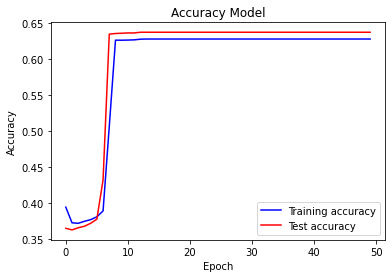

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy Model')
plt.legend()
plt.show()

In [13]:
import tensorflow as tf

In [14]:
tf.keras.models.load_model('C:/Users/Admin/Desktop/Me/capstone/color_sample/colorize_autoencoder.model',custom_objects=None, compile=True)  

In [17]:
img_path = (r'C:\Users\Admin\Desktop\Me\capstone\test_images\b_w_img\deepika-padukone.jpg') 
input_img=tf.keras.utils.load_img(img_path,target_size=(256,256))
input_img = tf.keras.utils.img_to_array(input_img)

In [18]:
img1_color=[]
img1_color.append(input_img)

In [19]:
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

In [20]:
output1 = model.predict(img1_color)
output1 = output1*128

1/1 [==============================] - 0s 500ms/step


In [21]:
from skimage import io
import cv2 
from skimage import color
from skimage.color import rgb2lab,lab2rgb

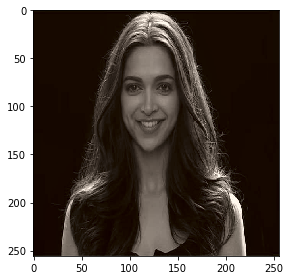

In [22]:
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
io.imshow(lab2rgb(result))

In [ ]:
#for getting a better experience lets try VGG


## VGG 16

In [23]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16()
newmodel = Sequential() 

In [24]:
for i, layer in enumerate(vggmodel.layers):
    if i<19:          #Only up to 19th layer to include feature extraction only
      newmodel.add(layer)
newmodel.summary()
for layer in newmodel.layers:
  layer.trainable=False   #We don't want to train these layers again, so False. 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [25]:
path = 'C:/Users/Admin/Desktop/Me/capstone/color_sample'

In [26]:
#Normalize images - divide by 255
train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, target_size=(224, 224), batch_size=32, class_mode=None)


Found 5100 images belonging to 3 classes.


In [27]:
#Convert from RGB to Lab
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)


#now we have one channel of L in each layer but, VGG16 is expecting 3 dimension, 
#so we repeated the L channel two times to get 3 dimensions of the same L channel
from skimage.color import gray2rgb
vggfeatures = []
for i, sample in enumerate(X):
  sample = gray2rgb(sample)
  sample = sample.reshape((1,224,224,3))
  prediction = newmodel.predict(sample)
  prediction = prediction.reshape((7,7,512))
  vggfeatures.append(prediction)
vggfeatures = np.array(vggfeatures)
print(vggfeatures.shape)

(32, 224, 224, 1)
(32, 224, 224, 2)
1/1 [==============================] - 0s 315ms/step
(32, 7, 7, 512)


In [28]:
#Decoder
model = Sequential()

model.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 7, 7, 256)         1179904   
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         295040    
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 up_sampling2d_4 (UpSampling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 32)       

In [31]:
model.compile(optimizer='Adam', loss='mse' , metrics=['accuracy'])
history = model.fit(vggfeatures, Y, validation_split=0.1,verbose=1, epochs=500, batch_size=128)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.0032 - accuracy: 0.8091 - val_loss: 0.1344 - val_accuracy: 0.7923
Epoch 2/500
1/1 [==============================] - 1s 749ms/step - loss: 0.1984 - accuracy: 0.7293 - val_loss: 0.0090 - val_accuracy: 0.8062
Epoch 3/500
1/1 [==============================] - 1s 767ms/step - loss: 0.0186 - accuracy: 0.7924 - val_loss: 0.0143 - val_accuracy: 0.3902
Epoch 4/500
1/1 [==============================] - 1s 800ms/step - loss: 0.0155 - accuracy: 0.4383 - val_loss: 0.0222 - val_accuracy: 0.2714
Epoch 5/500
1/1 [==============================] - 1s 718ms/step - loss: 0.0214 - accuracy: 0.3220 - val_loss: 0.0228 - val_accuracy: 0.2513
Epoch 6/500
1/1 [==============================] - 1s 700ms/step - loss: 0.0200 - accuracy: 0.3201 - val_loss: 0.0211 - val_accuracy: 0.2837
Epoch 7/500
1/1 [==============================] - 1s 750ms/step - loss: 0.0176 - accuracy: 0.3518 - val_loss: 0.0184 - val_accuracy: 0.4226
Epoch 8/500
1/1 

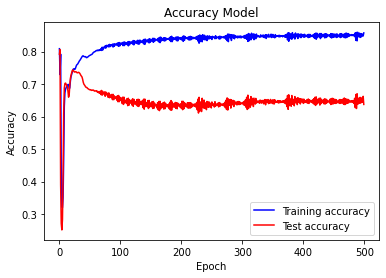

In [32]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy Model')
plt.legend()
plt.show()

In [33]:
#Predicting using saved model.
model = tf.keras.models.load_model('C:/Users/Admin/Desktop/Me/capstone/color_sample/colorize_autoencoder_VGG16.model',custom_objects=None,compile=True)

In [41]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from skimage.transform import resize
from skimage.io import imsave, imshow

1/1 [==============================] - 0s 25ms/step


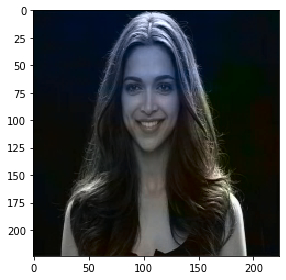

In [42]:
test_im  = img_to_array(load_img('C:/Users/Admin/Desktop/Me/capstone/test_images/BW_VGG/deepika-padukone.jpg'))
test_im = resize(test_im, (224,224), anti_aliasing=True)
test_im*= 1.0/255
lab = rgb2lab(test_im)
l = lab[:,:,0]
L = gray2rgb(l)
L = L.reshape((1,224,224,3))
#print(L.shape)
vggpred = newmodel.predict(L)
ab = model.predict(vggpred)
#print(ab.shape)
ab = ab*128
cur = np.zeros((224, 224, 3))
cur[:,:,0] = l
cur[:,:,1:] = ab
imshow(lab2rgb(cur))